In [1380]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_name='Global_Retail_Bank_Customer_Analysis.csv'

with open(file_name, 'r') as file:
    data = file.read()

    # Read the file
    data = pd.read_csv(file_name)

In [1381]:
#Have the basic information of the data
print(data.head(),'\n')
print(data.info(),'\n')
print(data.describe(),'\n')

  Market Proposition     Primary          Tenure         Age International CA  \
0    AUH   3. Bronze  1. Primary  2. 1 - 3 years  2. 25 - 35   2. Domestic  N   
1    AUH   3. Bronze  1. Primary  2. 1 - 3 years  2. 25 - 35   2. Domestic  N   
2    AUH   3. Bronze  1. Primary  2. 1 - 3 years  2. 25 - 35   2. Domestic  N   
3    AUH   3. Bronze  1. Primary  2. 1 - 3 years  2. 25 - 35   2. Domestic  N   
4    AUH   3. Bronze  1. Primary  2. 1 - 3 years  2. 25 - 35   2. Domestic  N   

  Card Insurance Investment  ... Numcust    TRB Revenue  Primary_cust  \
0    N         Y          N  ...      10  90000    1500            10   
1    N         Y          N  ...      10  90000    1500            10   
2    N         Y          N  ...       8  72000    1200             8   
3    N         Y          N  ...       8  72000    1200             8   
4    N         Y          N  ...      10  90000    1500            10   

   Digital_cust  CA_holders  Card_holders  Ins_holders  Inv_holders  \
0  

In [1382]:
# Check for missing values
print("Missing values for each column:")
print(data.isnull().sum(), '\n')

Missing values for each column:
Market           0
Proposition      0
Primary          0
Tenure           0
Age              0
International    0
CA               0
Card             0
Insurance        0
Investment       0
Mortgage         0
NPS              0
Digital          0
Numcust          0
TRB              0
Revenue          0
Primary_cust     0
Digital_cust     0
CA_holders       0
Card_holders     0
Ins_holders      0
Inv_holders      0
Mort_holders     0
dtype: int64 



In [1383]:
# Check the distribution of the data
for column in data.columns:
    if data[column].dtype == 'int64':
        plt.figure(figsize=(10, 4))
        plt.title(column)
        sns.histplot(data[column])
        plt.show()
    elif data[column].dtype == 'object':
        plt.figure(figsize=(6, 6))
        plt.title(column)
        value_counts = data[column].value_counts()
        value_counts.plot.pie(autopct=lambda pct: f"{pct:.1f}%\n({int(pct * len(data[column]) / 100)})")
        plt.axis('equal')
        plt.show()

In [1384]:
# Remove the outliers for columns with dtype int64
int64_columns = data.select_dtypes(include='int64').columns
for column in int64_columns:
    data = data[(np.abs(stats.zscore(data[column])) < 3)]


In [1385]:
# Check after cleaning
for column in data.columns:
    if data[column].dtype == 'int64':
        plt.figure(figsize=(10, 4))
        plt.title(column)
        # sns.histplot(data[column], kde=True)
        sns.histplot(data[column])
        plt.show()
    elif data[column].dtype == 'object':
        plt.figure(figsize=(6, 6))
        plt.title(column)
        value_counts = data[column].value_counts()
        value_counts.plot.pie(autopct=lambda pct: f"{pct:.1f}%\n({int(pct * len(data[column]) / 100)})")
        plt.axis('equal')
        plt.show()


In [1386]:
# Check the correlation between numeric variables
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

print("Correlation matrix:")
print(correlation, '\n')

In [1387]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

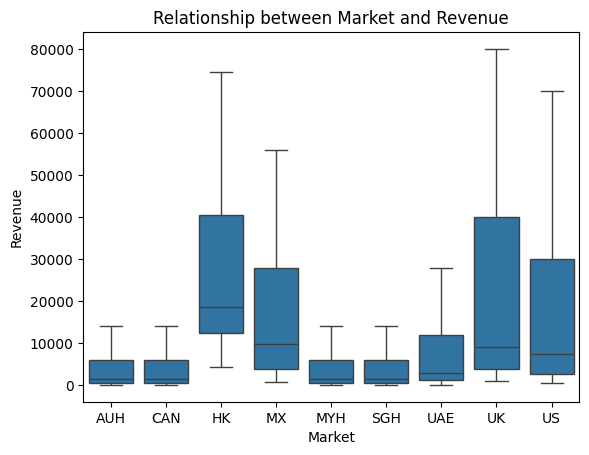

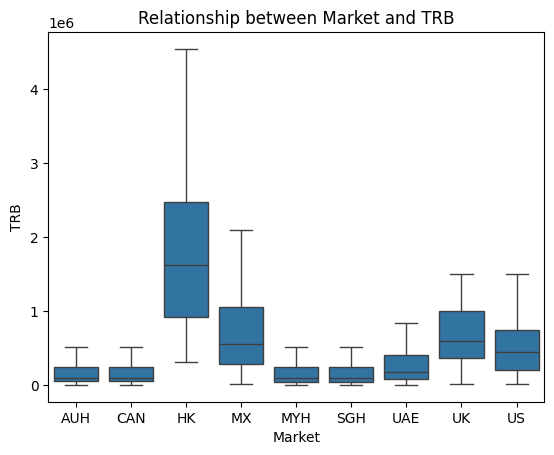

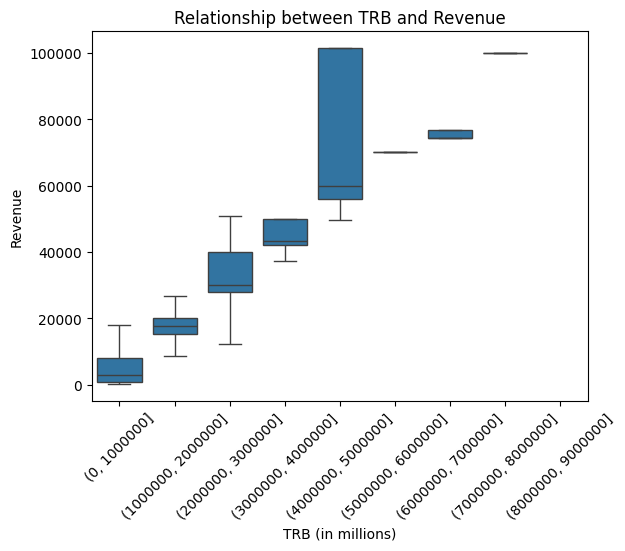

In [1388]:
# Relationship between Market and Revenue
sns.boxplot(x='Market', y='Revenue', data=data, showfliers=False)
plt.xlabel('Market')
plt.ylabel('Revenue')
plt.title('Relationship between Market and Revenue')
plt.show()

# Relationship between Market and TRB
sns.boxplot(x='Market', y='TRB', data=data, showfliers=False)
plt.xlabel('Market')
plt.ylabel('TRB')
plt.title('Relationship between Market and TRB')
plt.show()

#Relationship between TRB and Revenue

# Create bins for TRB values
bins = pd.interval_range(start=0, end=9000000, freq=1000000)

# Group the data based on TRB bins
data['TRB_group'] = pd.cut(data['TRB'], bins)

# Plot the relationship between TRB and Revenue
sns.boxplot(x='TRB_group', y='Revenue', data=data, showfliers=False)
plt.xlabel('TRB (in millions)')
plt.ylabel('Revenue')
plt.title('Relationship between TRB and Revenue')
plt.xticks(rotation=45)
plt.show()


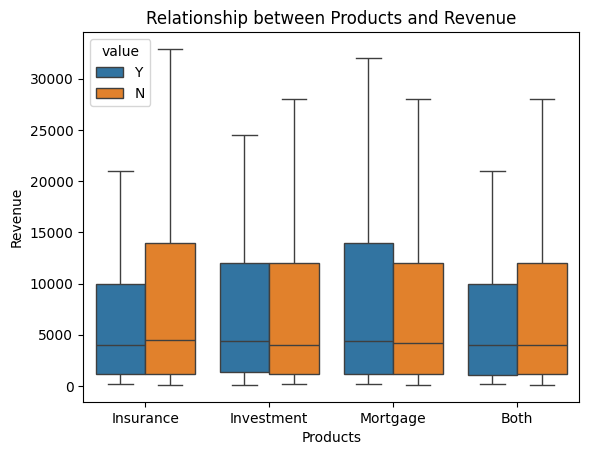

In [1389]:
# Relationship Between Insurance / Investment / Mortgage and Revenue
Insurance_Y     = data[((data['Insurance'] == 'Y') & (data['Investment'] == 'N') & (data['Mortgage'] == 'N')) | (data['Insurance'] == 'N')]
Investment_Y    = data[((data['Insurance'] == 'N') & (data['Investment'] == 'Y') & (data['Mortgage'] == 'N')) | (data['Investment'] == 'N')]
Mortgage_Y      = data[((data['Insurance'] == 'N') & (data['Investment'] == 'N') & (data['Mortgage'] == 'Y')) | (data['Mortgage'] == 'N')]
data['Both']   = np.where((data['Insurance'] == 'Y') & (data['Investment'] == 'Y') & (data['Mortgage'] == 'Y'), 'Y', 'N')

# Reform
data_melted_Insurance = Insurance_Y.melt(id_vars='Revenue', value_vars=['Insurance'], var_name='Products')
data_melted_Investment = Investment_Y.melt(id_vars='Revenue', value_vars=['Investment'], var_name='Products')
data_melted_Mortgage = Mortgage_Y.melt(id_vars='Revenue', value_vars=['Mortgage'], var_name='Products')
data_melted_All = data.melt(id_vars='Revenue', value_vars=['Both'], var_name='Products')

# Merge DataFrame
data_melted = pd.concat([data_melted_Insurance, data_melted_Investment, data_melted_Mortgage, data_melted_All])

# Ploting
sns.boxplot(x='Products', y='Revenue', hue='value', data=data_melted, showfliers=False)
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Relationship between Products and Revenue')
plt.show()